In [6]:
import pandas as pd
import numpy as np

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Laptop Prediction.ipynb
./laptop_data_cleaned.csv
./.ipynb_checkpoints\Laptop Prediction-checkpoint.ipynb


In [7]:
data = pd.read_csv('./laptop_data_cleaned.csv')

In [8]:
print(data.head())

  Company   TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0   Apple  Ultrabook    8    1.37  11.175755            0    1  226.983005   
1   Apple  Ultrabook    8    1.34  10.776777            0    0  127.677940   
2      HP   Notebook    8    1.86  10.329931            0    0  141.211998   
3   Apple  Ultrabook   16    1.83  11.814476            0    1  220.534624   
4   Apple  Ultrabook    8    1.37  11.473101            0    1  226.983005   

       Cpu_brand  HDD  SSD Gpu_brand      Os  
0  Intel Core i5    0  128     Intel     Mac  
1  Intel Core i5    0    0     Intel     Mac  
2  Intel Core i5    0  256     Intel  Others  
3  Intel Core i7    0  512       AMD     Mac  
4  Intel Core i5    0  256     Intel     Mac  


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [10]:
data.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [11]:
data.value_counts()

Company  TypeName            Ram  Weight  Price      TouchScreen  Ips  Ppi         Cpu_brand              HDD   SSD  Gpu_brand  Os     
Toshiba  Notebook            4    1.20    11.061462  0            0    165.632118  Intel Core i5          0     128  Intel      Windows    2
Acer     2 in 1 Convertible  4    1.25    9.830633   1            1    189.905791  Other Intel Processor  0     0    Intel      Windows    1
Lenovo   2 in 1 Convertible  8    1.74    10.776844  0            1    157.350512  Intel Core i5          0     256  Intel      Windows    1
                             4    1.80    10.700607  1            0    157.350512  Intel Core i5          0     128  Intel      Windows    1
                                          10.433899  1            1    157.350512  Intel Core i7          0     128  Intel      Windows    1
                                                                                                                                          ..
Dell     Notebook 

## Data Visualization

In [12]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


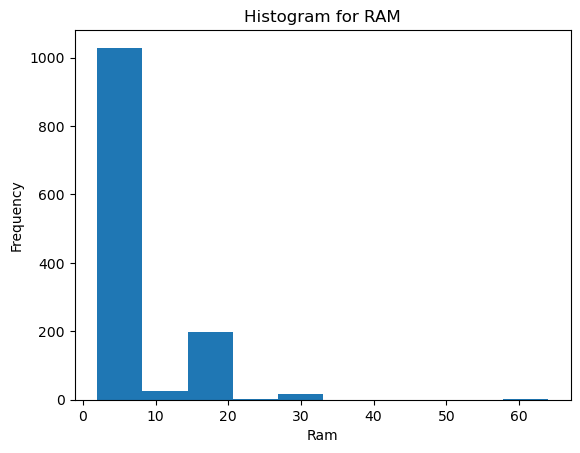

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
column = "Ram"
plt.hist(data[column], bins = 10)
plt.title(f'Histogram for RAM')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

In [14]:
uniqueRamVals = data['Ram'].unique()
uniqueRamVals

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64], dtype=int64)

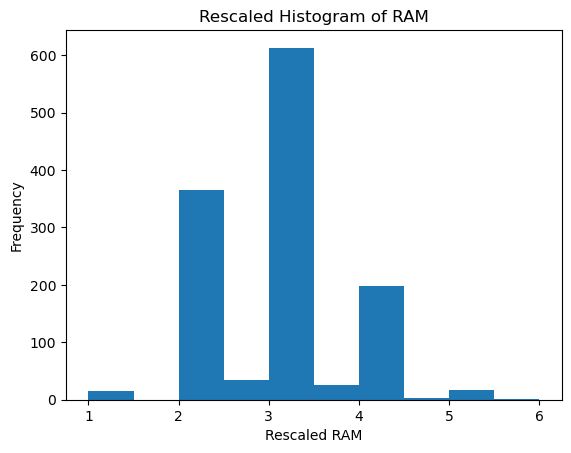

In [15]:
data['Rescaled_RAM'] = np.log2(data['Ram'])
plt.hist(data['Rescaled_RAM'], bins = 10)
plt.title('Rescaled Histogram of RAM')
plt.xlabel('Rescaled RAM')
plt.ylabel('Frequency')
plt.show()

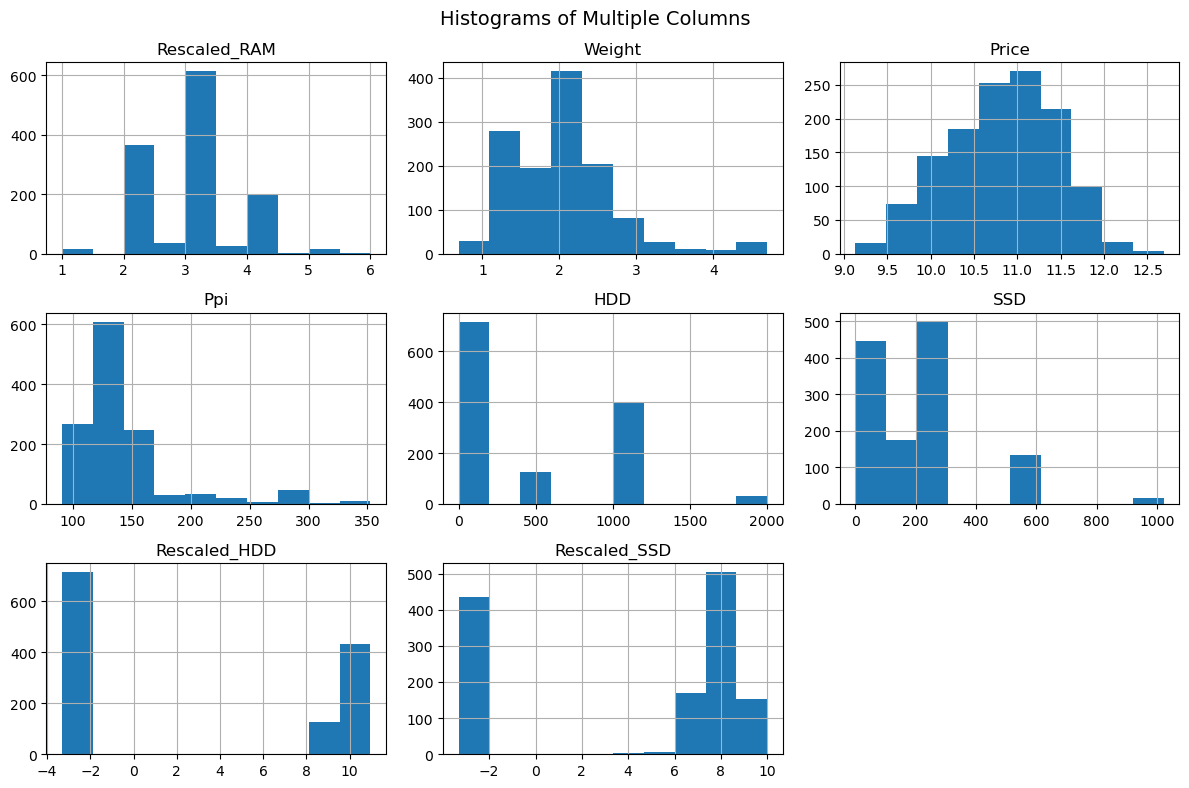

In [16]:
data['HDD_not_null'] = data['HDD']+0.1
data['SSD_not_null'] = data['SSD']+0.1
data['Rescaled_HDD'] = np.log2(data['HDD_not_null'])
data['Rescaled_SSD'] = np.log2(data['SSD_not_null'])
columns = ['Rescaled_RAM', 'Weight', 'Price', 'Ppi', 'HDD', 'SSD', 'Rescaled_HDD', 'Rescaled_SSD']
data[columns].hist(bins=10, figsize = (12, 8))
plt.suptitle('Histograms of Multiple Columns', fontsize = 14)
plt.tight_layout()
plt.show()

- vs Rescaled RAM : The trident-like shape for the histogram of RAM, after applying a logarithmic transformation, indicates the presence of distinct groups or clusters of RAM sizes. This shape suggests that there are specific RAM configurations that are more prevalent in the dataset, with fewer laptops falling into the intermediate RAM size ranges.

- vs Weight : The double maxima and left-skewed shape of the weight histogram indicate the presence of two distinct groups or categories of laptops based on their weight. The left skewness suggests that a majority of laptops in your dataset are lighter, while a smaller number of laptops fall into the heavier weight range.

- vs Price : This shape indicates that the prices of laptops in the dataset are slightly skewed towards higher values. The well-spread nature suggests a wide range of laptop prices, indicating the presence of both budget-friendly and higher-end options.

- vs PPI : A left-skewed histogram with a high slope suggests that the pixel density (PPI) of laptops in the dataset is concentrated towards lower values. The high slope indicates a steep decline in the frequency as PPI increases, which means a majority of laptops have lower pixel densities.

- vs HDD & SSD (rescaled) : Additional EDA needs to be done to understand factors influencing such curves. Negative values indicate absence of either (null value). On observation, one can say that SSD is regarded more valuable than HDD, roughly by the frequency of 200-300.Absence of HDD matters less to some extent.

In [17]:
hist, bins = np.histogram(data['Rescaled_HDD'], bins = 10)
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")

Bin 1: 714
Bin 2: 0
Bin 3: 0
Bin 4: 0
Bin 5: 0
Bin 6: 1
Bin 7: 0
Bin 8: 1
Bin 9: 125
Bin 10: 432


In [18]:
hist, bins = np.histogram(data['Rescaled_SSD'], bins = 10)
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")

Bin 1: 436
Bin 2: 0
Bin 3: 0
Bin 4: 0
Bin 5: 1
Bin 6: 3
Bin 7: 7
Bin 8: 170
Bin 9: 504
Bin 10: 152


In [19]:
print("Nearly", round((714)/(436+714) * 100, 2),"% of all laptops with missing HDD")

Nearly 62.09 % of all laptops with missing HDD


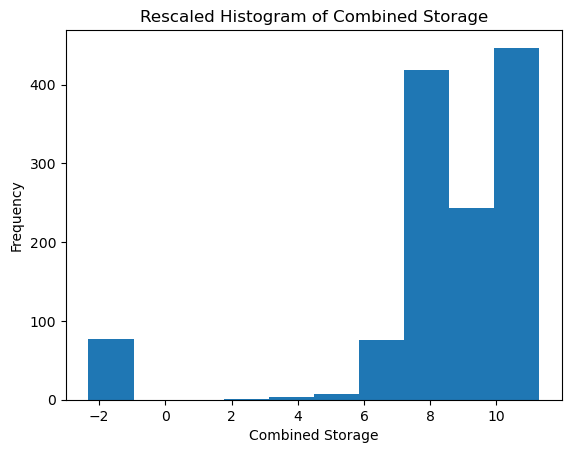

In [20]:
data['Combined'] = np.log2(data['HDD_not_null'] + data['SSD_not_null'])
plt.hist(data['Combined'], bins = 10) 
plt.title('Rescaled Histogram of Combined Storage')
plt.xlabel('Combined Storage')
plt.ylabel('Frequency')
plt.show()

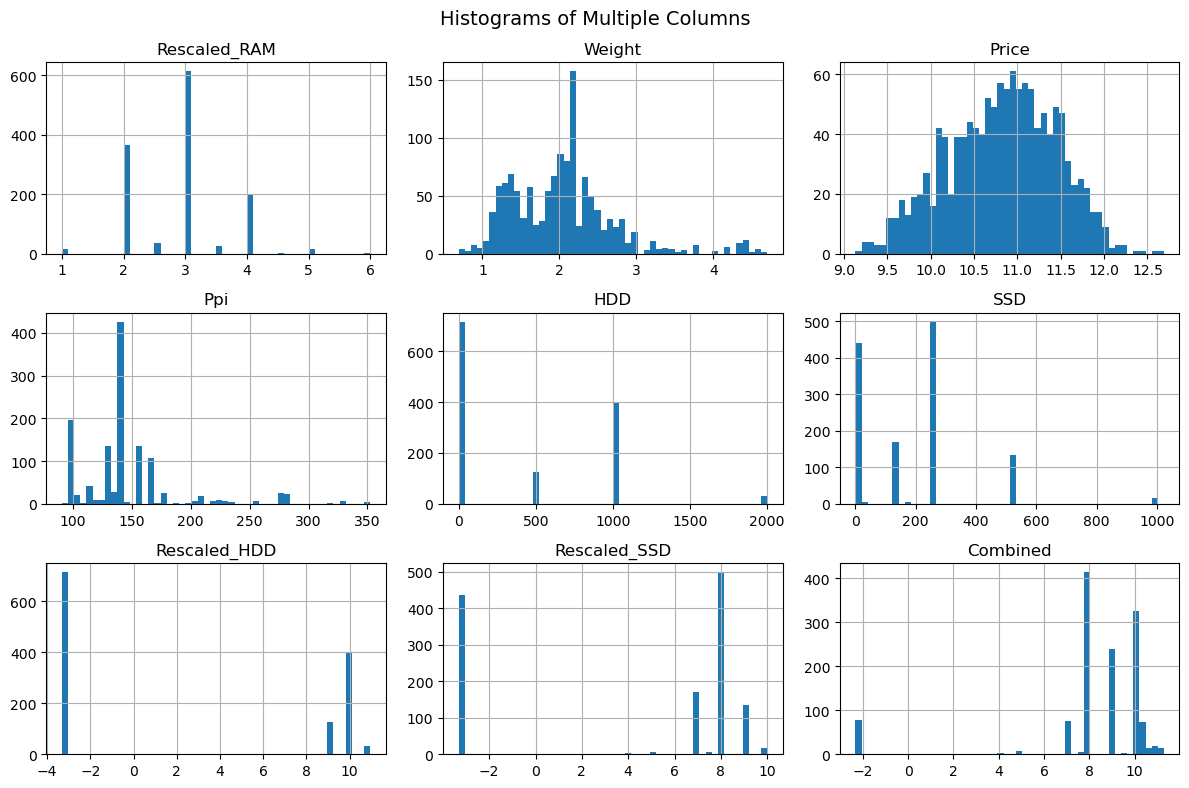

In [21]:
data['HDD_not_null'] = data['HDD'] + 0.1
data['SSD_not_null'] = data['SSD'] + 0.1
data['Rescaled_HDD'] = np.log2(data['HDD_not_null'])
data['Rescaled_SSD'] = np.log2(data['SSD_not_null'])
columns = ['Rescaled_RAM', 'Weight', 'Price', 'Ppi', 'HDD', 'SSD', 'Rescaled_HDD', 'Rescaled_SSD', 'Combined']
data[columns].hist(bins = 50, figsize = (12, 8))
plt.suptitle('Histograms of Multiple Columns', fontsize = 14)
plt.tight_layout()
plt.show()

Not much difference than before, but helps us dealing with rescaled SSD, combined and HDD. Ignoring null parts of Rescaled SSD and HDD -> They do not follow any continuous distributions since they are very discretized. Speaking about Binomial, it does look like so. But do they have equal probability of success or in this case, opted to build the laptop. Real world data says no, due to pricing optimization and product pricing model.
Multinomial, very much. When we notice the distributions of SSD and HDD, to compare both, they follow similar patterns, with different mean and maxima.

## Chi-Squared Test, Cramér's V and ANOVA (one-way)

In [22]:
hdd_counts = [714, 0, 0, 0, 0, 1, 0, 1, 125, 432]
ssd_counts = [436, 0, 0, 0, 1, 3, 7, 170, 504, 152]
observed_freq = np.array([hdd_counts, ssd_counts])
observed_freq = observed_freq.astype(float)
epsilon = 0.5 #tried using 0.4 and 0.1 -> got low variance of p-value
observed_freq += epsilon
from scipy.stats import chi2_contingency
chi2, p, dof, expected_freq = chi2_contingency(observed_freq)
print("Chi-square stat:", chi2)
print("p-value:", p)
print("DoF:", dof)
print("Expected freq:", expected_freq)

Chi-square stat: 602.6410981250983
p-value: 5.6775595645334956e-124
DoF: 9
Expected freq: [[5.755e+02 5.000e-01 5.000e-01 5.000e-01 1.000e+00 2.500e+00 4.000e+00
  8.600e+01 3.150e+02 2.925e+02]
 [5.755e+02 5.000e-01 5.000e-01 5.000e-01 1.000e+00 2.500e+00 4.000e+00
  8.600e+01 3.150e+02 2.925e+02]]


The small p-values (e.g., 5.6e-124 and 4.7e-124 for e= 0.4) indicate strong evidence against the null hypothesis of independence between the HDD and SSD categories. Regardless of the precise epsilon value used, the statistical significance remains extremely low, suggesting a significant association or dependency between these categories.

The observed frequencies significantly differ from the expected frequencies, supporting the rejection of the null hypothesis.

The analysis reveals that the presence or absence of HDD and SSD in laptops is not independent and there is a connection between these storage types.
The analysis reveals that the presence or absence of HDD and SSD in laptops is not independent and there is a connection between these storage types.

In [23]:
import itertools
import scipy.stats as stats

columns = ['Rescaled_RAM', 'Weight', 'Price', 'Ppi', 'HDD', 'SSD', 'Rescaled_HDD', 'Rescaled_SSD']

combinations = []
for r in range(1, len(columns) + 1):
    combinations.extend(itertools.combinations(columns, r))

results = []
for combo in combinations:
    observed = data[list(combo)].values
    chi2, p_value = stats.chisquare(observed, axis=None)
    results.append((combo, chi2, p_value))
    
results.sort(key = lambda x: x[2])

for combination, chi2, p_value in results:
    print("Combination:", combination)
    print("Chi-square statistic:", chi2)
    print("p-value:", p_value)
    print()

Combination: ('Ppi',)
Chi-square statistic: 15950.402683369495
p-value: 0.0

Combination: ('HDD',)
Chi-square statistic: 825155.9920707857
p-value: 0.0

Combination: ('SSD',)
Chi-square statistic: 237623.10100379586
p-value: 0.0

Combination: ('Rescaled_HDD',)
Chi-square statistic: 22203.27740990076
p-value: 0.0

Combination: ('Rescaled_SSD',)
Chi-square statistic: 9029.808276879483
p-value: 0.0

Combination: ('Rescaled_RAM', 'Ppi')
Chi-square statistic: 207661.8152506159
p-value: 0.0

Combination: ('Rescaled_RAM', 'HDD')
Chi-square statistic: 2154695.6161431097
p-value: 0.0

Combination: ('Rescaled_RAM', 'SSD')
Chi-square statistic: 694362.6684171668
p-value: 0.0

Combination: ('Rescaled_RAM', 'Rescaled_HDD')
Chi-square statistic: 20665.09152365301
p-value: 0.0

Combination: ('Rescaled_RAM', 'Rescaled_SSD')
Chi-square statistic: 11075.796224927002
p-value: 0.0

Combination: ('Weight', 'Price')
Chi-square statistic: 7802.175755125745
p-value: 0.0

Combination: ('Weight', 'Ppi')
Chi-squ

Further in-depth study is needed to understand this relation as consistent 0.0 is obtained with high chi-square stat.

In [24]:
def cramers_v(confusion_matrix):
    chi2 = 602.6410981250983
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

contingency_table = np.array([hdd_counts, ssd_counts])


print("Cramér's V:", cramers_v(contingency_table))

Cramér's V: 0.4829662983650555


A value of 0.4829662983650555 suggests a moderate level of association between the HDD and SSD counts.

In [25]:
import pandas as pd

from scipy.stats import levene
statistic, p_value = levene(data['Rescaled_RAM'],
    data['Weight'],
    data['Price'],
    data['Ppi'],
    data['Rescaled_HDD'],
    data['Rescaled_SSD'])
print("Levene's Test")
print("-------------")
print("Test Statistic: ", statistic)
print("p-value: ", p_value)

Levene's Test
-------------
Test Statistic:  564.2682453193474
p-value:  0.0


In [26]:
import scipy.stats as stats

anova_result = stats.f_oneway(
    data['Rescaled_RAM'],
    data['Weight'],
    data['Price'],
    data['Ppi'],
    data['Rescaled_HDD'],
    data['Rescaled_SSD']
)

print("ANOVA result:")
print("-------------")
print("F-value: ", anova_result.statistic)
print("p-value: ", anova_result.pvalue)

ANOVA result:
-------------
F-value:  13536.028703446931
p-value:  0.0


In conclusion, the statistical analysis indicates that the variables 'Rescaled_RAM', 'Weight', 'Price', 'Ppi', 'Rescaled_HDD', and 'Rescaled_SSD' have a significant impact on the outcome variable. The variables are not independent of each other, and there is a moderate association between the 'HDD' and 'SSD' counts. These findings provide valuable insights into the relationships and influences among the variables in the dataset.

## Box, Scatter Plots

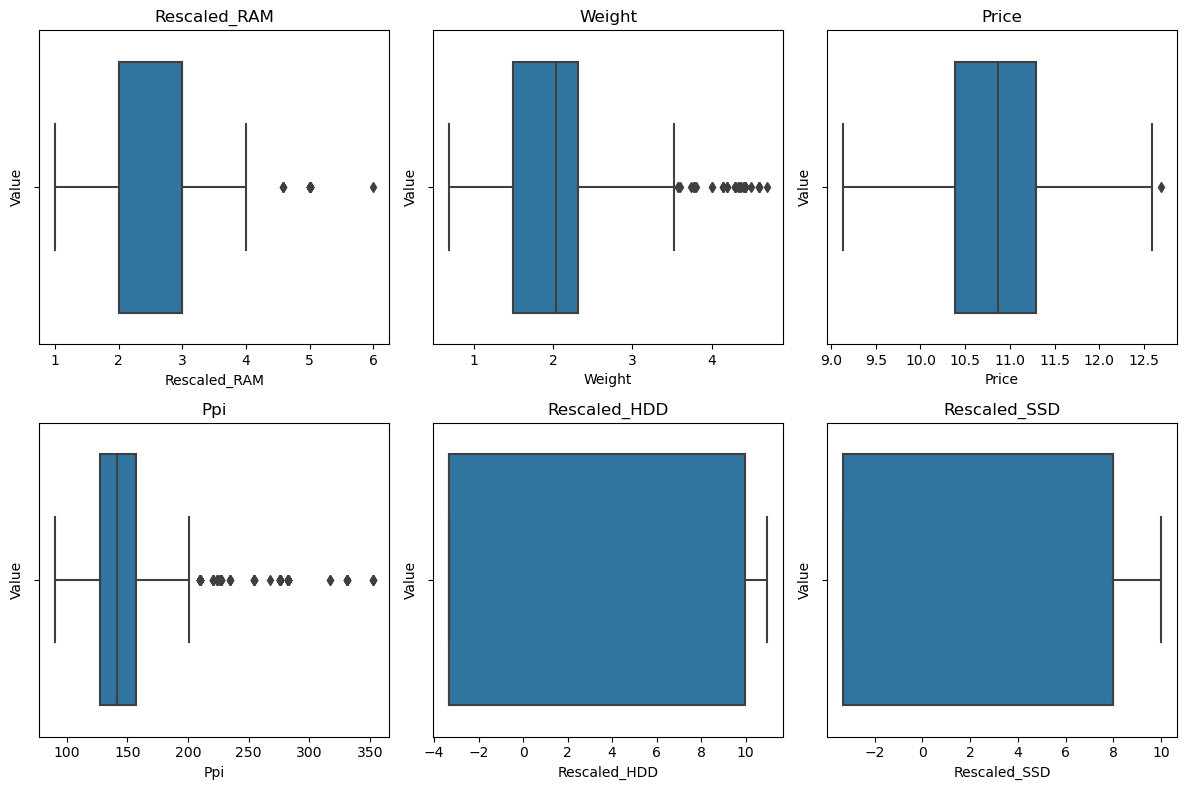

In [27]:
variables = ['Rescaled_RAM', 'Weight', 'Price', 'Ppi', 'Rescaled_HDD', 'Rescaled_SSD']

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))

for i, var in enumerate(variables):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x=var, data=data, ax=ax)
    ax.set_title(var)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

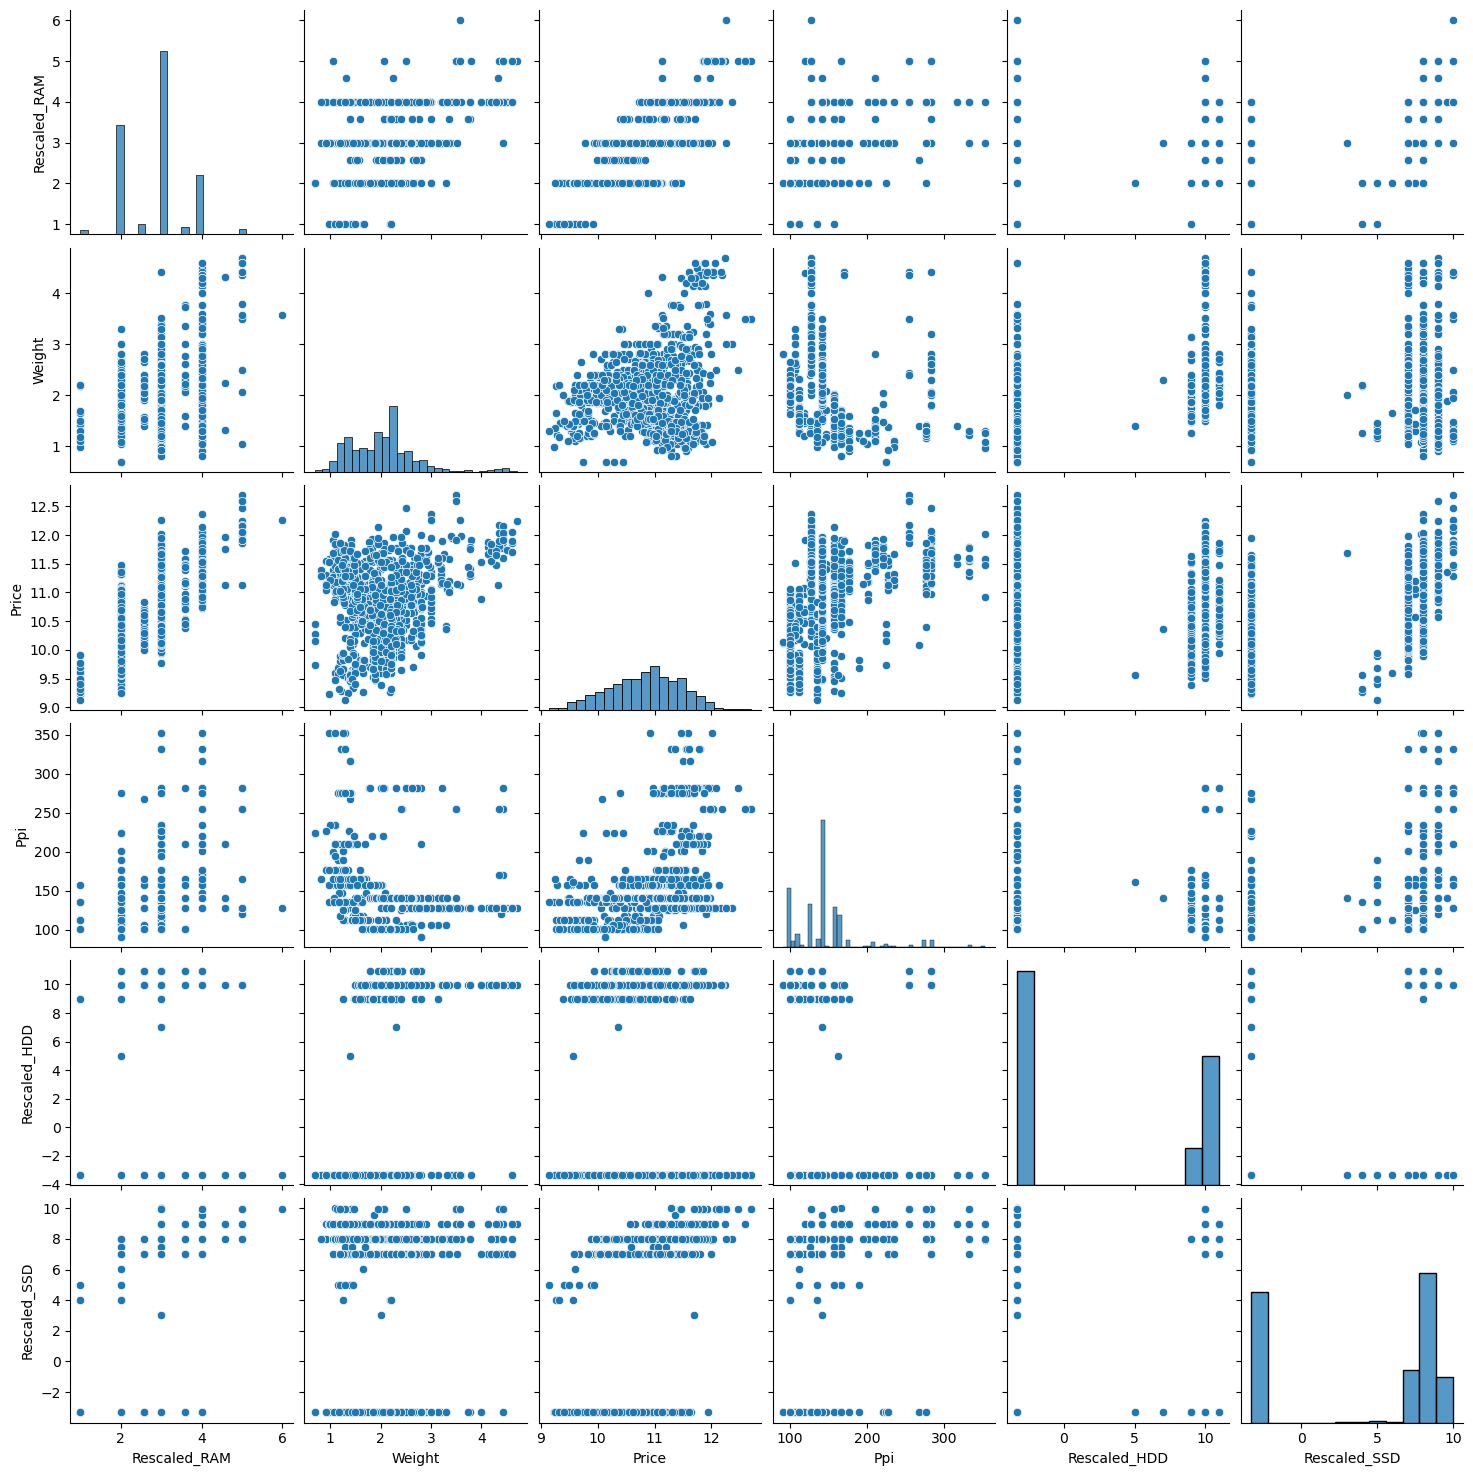

In [28]:
variables = ['Rescaled_RAM', 'Weight', 'Price', 'Ppi', 'Rescaled_HDD', 'Rescaled_SSD']
sns.pairplot(data[variables])
plt.show()

In [29]:
correlation, p_value = stats.pearsonr(data['Weight'], data['Price'])
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.15138619201067033
p-value:  5.7203661732177505e-08


The Pearson's correlation coefficient between the variables is 0.151, indicating a weak positive linear relationship. The p-value of 5.72e-08 is very small, suggesting that this correlation is statistically significant. Based on these results, we can conclude that there is a statistically significant but weak positive linear relationship between the variables we examined. However, it's important to note that correlation does not imply causation. The presence of a correlation does not necessarily mean that one variable is causing changes in the other.
Here weight and price have a chaotic scatter plot, it indicates that there is no clear linear relationship between those two variables. The low correlation coefficient and the scatter plot's lack of a discernible pattern support this observation.

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\3833460925.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)


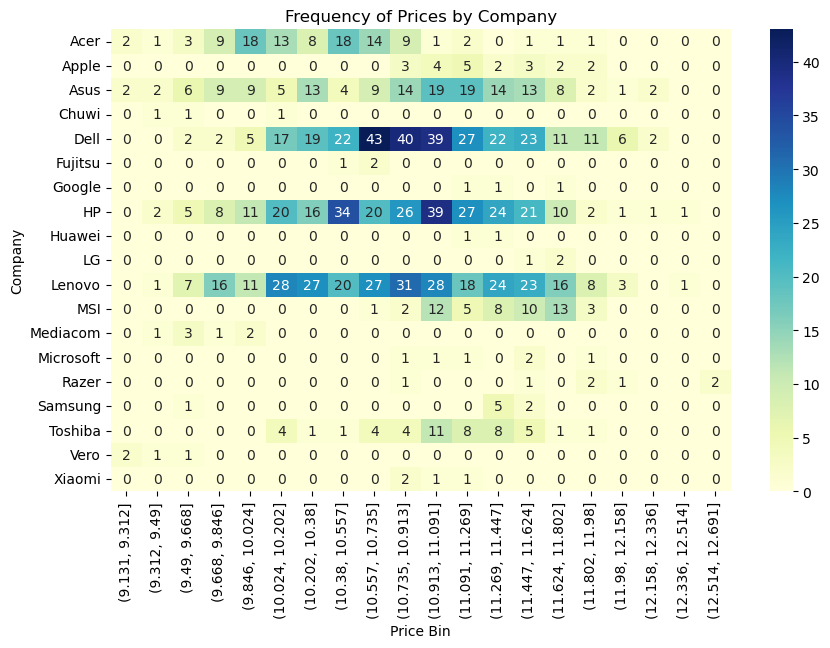

In [30]:
subset_data = data[['Company', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)
heatmap_data = subset_data.groupby(['Company', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by Company')
plt.xlabel('Price Bin')
plt.ylabel('Company')
plt.show()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\629571519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)


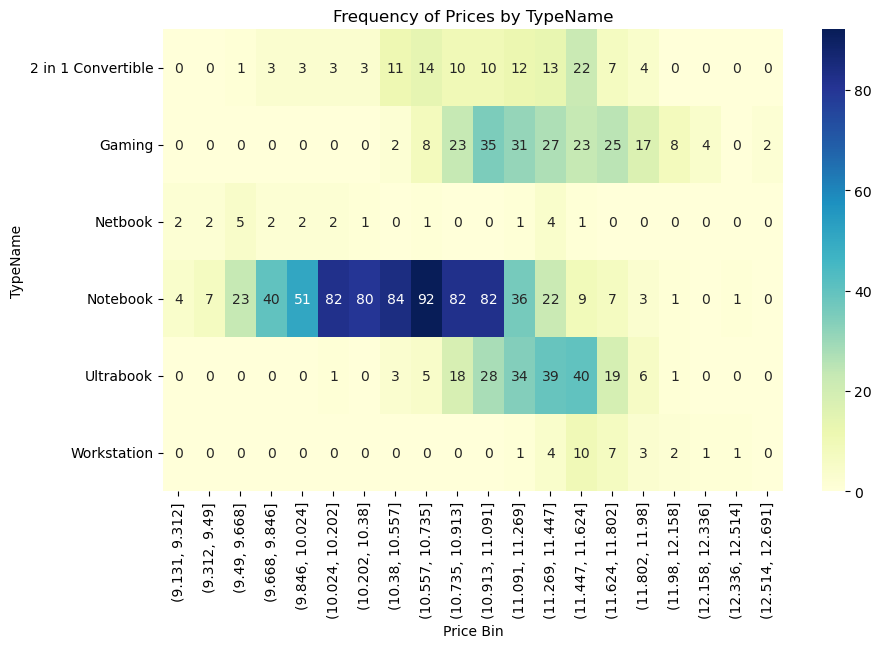

In [31]:
subset_data = data[['TypeName', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)
heatmap_data = subset_data.groupby(['TypeName', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by TypeName')
plt.xlabel('Price Bin')
plt.ylabel('TypeName')
plt.show()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\4002374621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins=20)


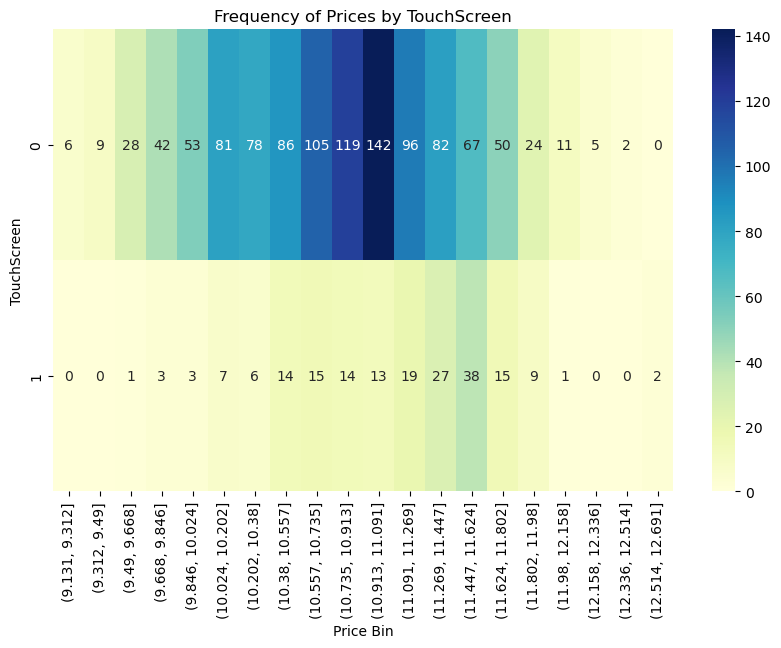

In [32]:
subset_data = data[['TouchScreen', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins=20)
heatmap_data = subset_data.groupby(['TouchScreen', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by TouchScreen')
plt.xlabel('Price Bin')
plt.ylabel('TouchScreen')
plt.show()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\536151757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)


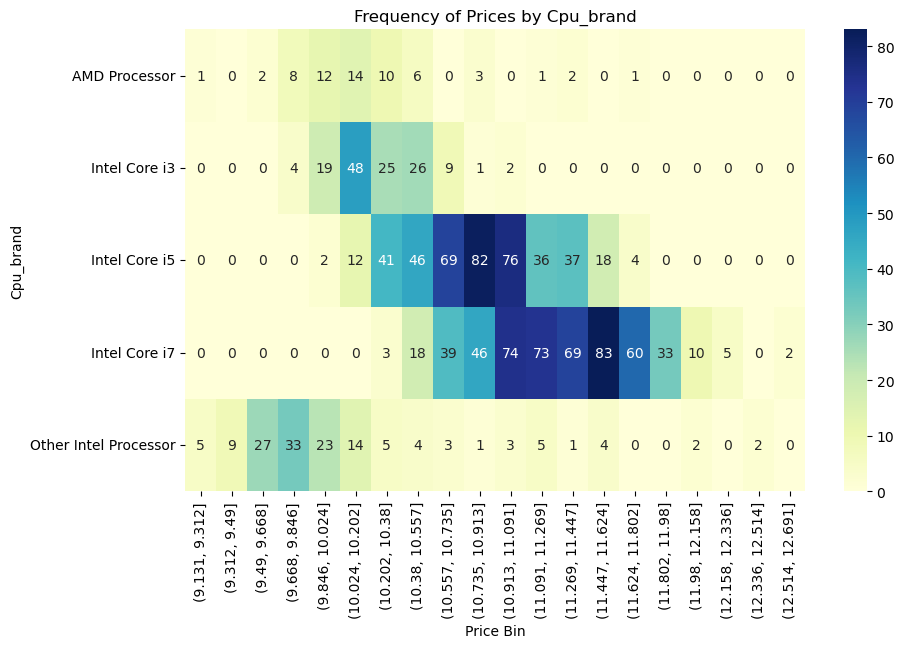

In [33]:
subset_data = data[['Cpu_brand', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)
heatmap_data = subset_data.groupby(['Cpu_brand', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by Cpu_brand')
plt.xlabel('Price Bin')
plt.ylabel('Cpu_brand')
plt.show()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\3789034907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)


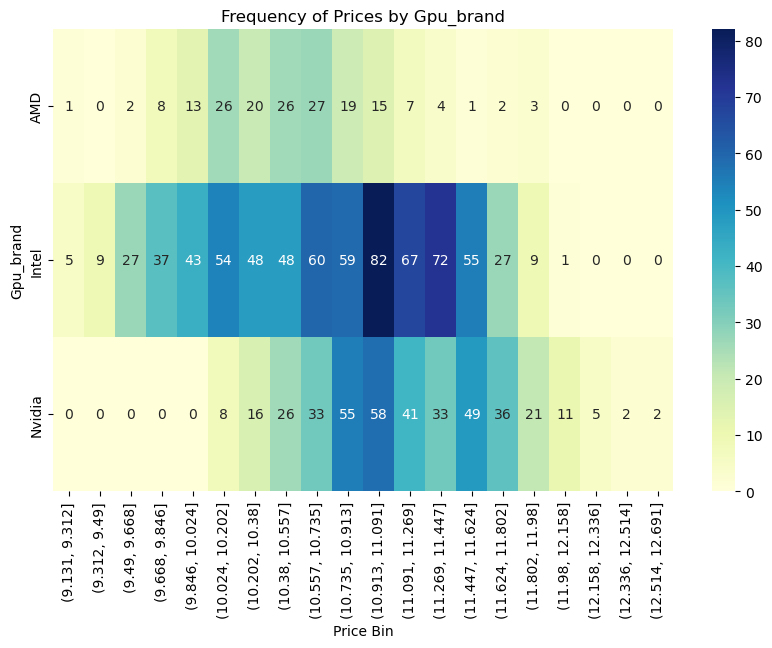

In [34]:
subset_data = data[['Gpu_brand', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)
heatmap_data = subset_data.groupby(['Gpu_brand', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by Gpu_brand')
plt.xlabel('Price Bin')
plt.ylabel('Gpu_brand')
plt.show()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\18309915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)


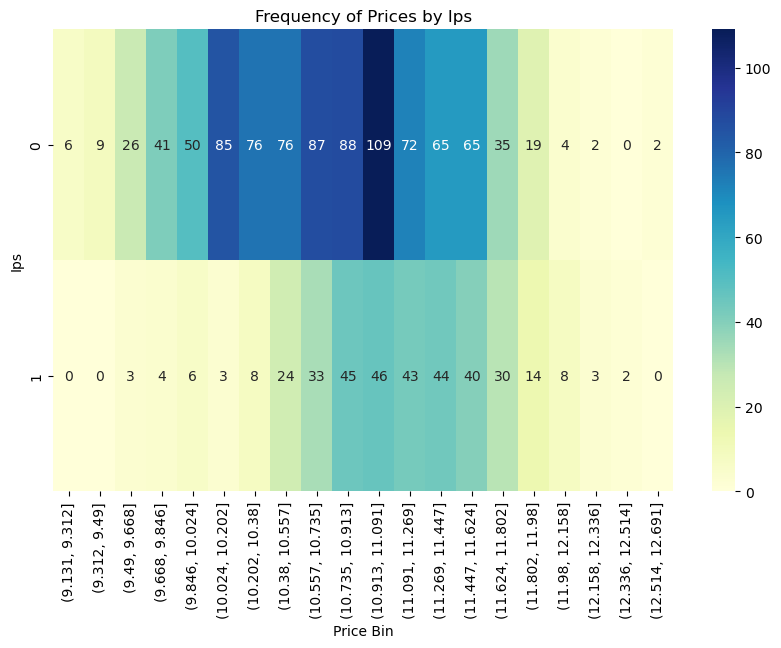

In [35]:
subset_data = data[['Ips', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)
heatmap_data = subset_data.groupby(['Ips', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by Ips')
plt.xlabel('Price Bin')
plt.ylabel('Ips')
plt.show()

C:\Users\sudha\AppData\Local\Temp\ipykernel_10472\3377646947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)


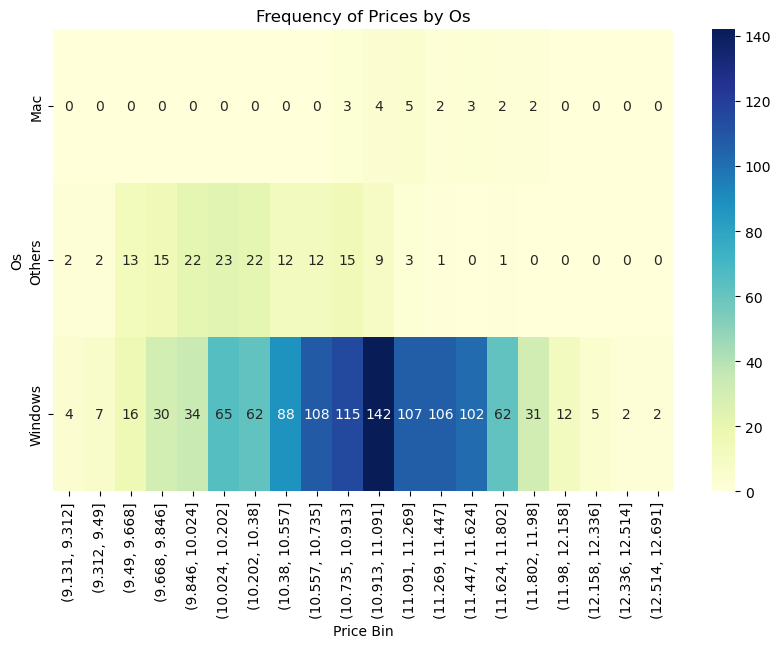

In [36]:
subset_data = data[['Os', 'Price']]
subset_data['Price Bin'] = pd.cut(subset_data['Price'], bins = 20)
heatmap_data = subset_data.groupby(['Os', 'Price Bin']).size().unstack(fill_value = 0)
plt.figure(figsize = (10, 6))
sns.heatmap(heatmap_data, cmap = 'YlGnBu', annot = True, fmt = 'd', cbar = True)
plt.title('Frequency of Prices by Os')
plt.xlabel('Price Bin')
plt.ylabel('Os')
plt.show()

## Feature Engineering

In [37]:
data.head(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,Rescaled_RAM,HDD_not_null,SSD_not_null,Rescaled_HDD,Rescaled_SSD,Combined
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,3.0,0.1,128.1,-3.321928,7.001127,7.002252
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,3.0,0.1,0.1,-3.321928,-3.321928,-2.321928
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others,3.0,0.1,256.1,-3.321928,8.000563,8.001127
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,4.0,0.1,512.1,-3.321928,9.000282,9.000563
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,3.0,0.1,256.1,-3.321928,8.000563,8.001127


In [38]:
categoricalVars = ['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os', 'Ips','Ram','HDD','SSD']
dataEncoded = pd.get_dummies(data, columns = categoricalVars, prefix = 'OHE', drop_first = True)
print(dataEncoded.head(5))

   Weight      Price  TouchScreen         Ppi  Rescaled_RAM  HDD_not_null  \
0    1.37  11.175755            0  226.983005           3.0           0.1   
1    1.34  10.776777            0  127.677940           3.0           0.1   
2    1.86  10.329931            0  141.211998           3.0           0.1   
3    1.83  11.814476            0  220.534624           4.0           0.1   
4    1.37  11.473101            0  226.983005           3.0           0.1   

   SSD_not_null  Rescaled_HDD  Rescaled_SSD  Combined  ...  OHE_32  OHE_64  \
0         128.1     -3.321928      7.001127  7.002252  ...       0       0   
1           0.1     -3.321928     -3.321928 -2.321928  ...       0       0   
2         256.1     -3.321928      8.000563  8.001127  ...       0       0   
3         512.1     -3.321928      9.000282  9.000563  ...       0       0   
4         256.1     -3.321928      8.000563  8.001127  ...       0       0   

   OHE_128  OHE_180  OHE_240  OHE_256  OHE_512  OHE_768  OHE_1000  O

## OHE based NN Model
Tentative

In [1]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 2.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install "tensorflow<2.11" 

     -------------------------------------- 455.9/455.9 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     -------------------------------------- 895.7/895.7 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 5.9/5.9 MB 5.8 MB/s eta 0:00:00
     -------------------------------------- 438.7/438.7 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 M

In [4]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(-761.4674, shape=(), dtype=float32)


In [5]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[]


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
X = data[['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os', 'Ips', 'Ram', 'HDD', 'SSD']]
y = data['Price']

y_array = y.to_numpy()

# Reshape the array
y_reshaped = y_array.reshape(-1, 1)

# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the target variable
normalized_y = scaler.fit_transform(y_reshaped)

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.28, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='softmax'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1))

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test loss: {loss:.4f}')

# Make predictions
predictions = model.predict(X_test_scaled)

Epoch 1/50
29/29 [==============================] - 2s 21ms/step - loss: 67.1922 - val_loss: 26.1281
Epoch 2/50
29/29 [==============================] - 0s 7ms/step - loss: 15.1179 - val_loss: 2.8227
Epoch 3/50
29/29 [==============================] - 0s 7ms/step - loss: 7.0477 - val_loss: 0.7509
Epoch 4/50
29/29 [==============================] - 0s 7ms/step - loss: 6.4357 - val_loss: 0.7060
Epoch 5/50
29/29 [==============================] - 0s 7ms/step - loss: 5.8564 - val_loss: 0.6784
Epoch 6/50
29/29 [==============================] - 0s 7ms/step - loss: 4.3177 - val_loss: 0.6735
Epoch 7/50
29/29 [==============================] - 0s 8ms/step - loss: 3.5901 - val_loss: 0.6106
Epoch 8/50
29/29 [==============================] - 0s 9ms/step - loss: 2.9964 - val_loss: 0.5355
Epoch 9/50
29/29 [==============================] - 0s 8ms/step - loss: 2.4966 - val_loss: 0.4871
Epoch 10/50
29/29 [==============================] - 0s 7ms/step - loss: 1.9433 - val_loss: 0.4737
Epoch 11/50
29/

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
predictions = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Print the report
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

12/12 [==============================] - 0s 3ms/step
Mean Squared Error: 0.3859
Mean Absolute Error: 0.5066


In [41]:
predictions = np.array(predictions)
actual_values = np.array(y_test)

# Calculate percentage errors
percentage_errors = (predictions - actual_values) / actual_values

# Calculate RMSPE and MAPE
rmspe = np.sqrt(np.mean(percentage_errors**2)) * 100
mape = np.mean(np.abs(percentage_errors)) * 100

# Print the report
print(f"Root Mean Squared Percentage Error: {rmspe:.4f}%")
print(f"Mean Absolute Percentage Error: {mape:.4f}%")

Root Mean Squared Percentage Error: 5.9366%
Mean Absolute Percentage Error: 4.7641%


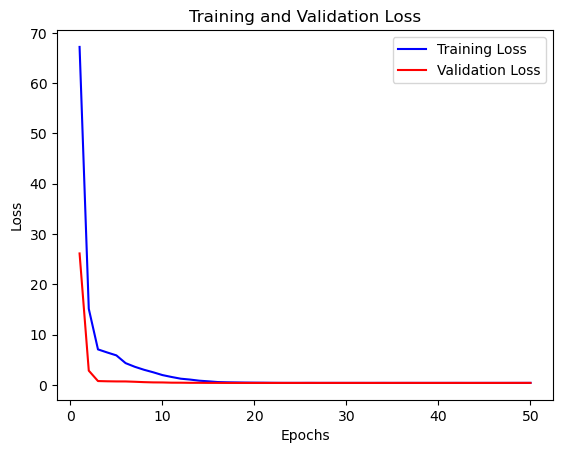

In [42]:
import matplotlib.pyplot as plt

# Get the loss history from the model training
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss curves
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

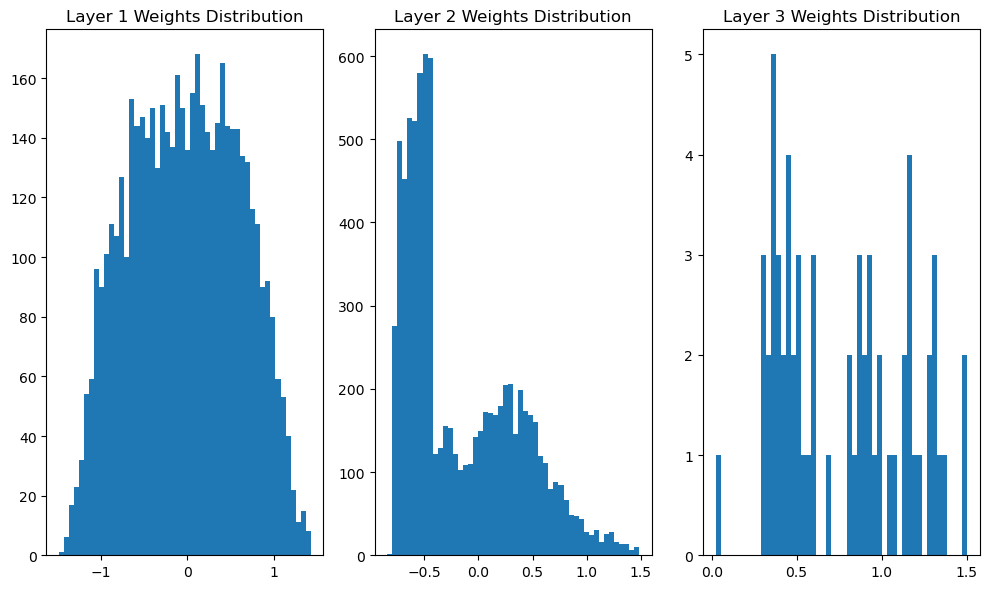

In [43]:
weights_layer1 = model.layers[0].get_weights()[0]
weights_layer2 = model.layers[2].get_weights()[0]
weights_layer3 = model.layers[4].get_weights()[0]

# Plot weight distributions
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.hist(np.ndarray.flatten(weights_layer1), bins=50)
plt.title('Layer 1 Weights Distribution')

plt.subplot(1, 3, 2)
plt.hist(np.ndarray.flatten(weights_layer2), bins=50)
plt.title('Layer 2 Weights Distribution')

plt.subplot(1, 3, 3)
plt.hist(np.ndarray.flatten(weights_layer3), bins=50)
plt.title('Layer 3 Weights Distribution')

plt.tight_layout()
plt.show()

C:\Users\sudha\Documents\Sample_Project_1\env\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The weight distribution in layer 2 does not follow a normal distribution.
The weight distribution in layer 2 has a significant skewness.
The weight distribution in layer 3 does not follow a normal distribution.
The weight distribution in layer 3 is within an acceptable skewness threshold.
Summary statistics for layer 2:
Mean: -0.1615, Median: -0.4122, Standard Deviation: 0.5170
Summary statistics for layer 3:
Mean: 0.7759, Median: 0.8103, Standard Deviation: 0.3738


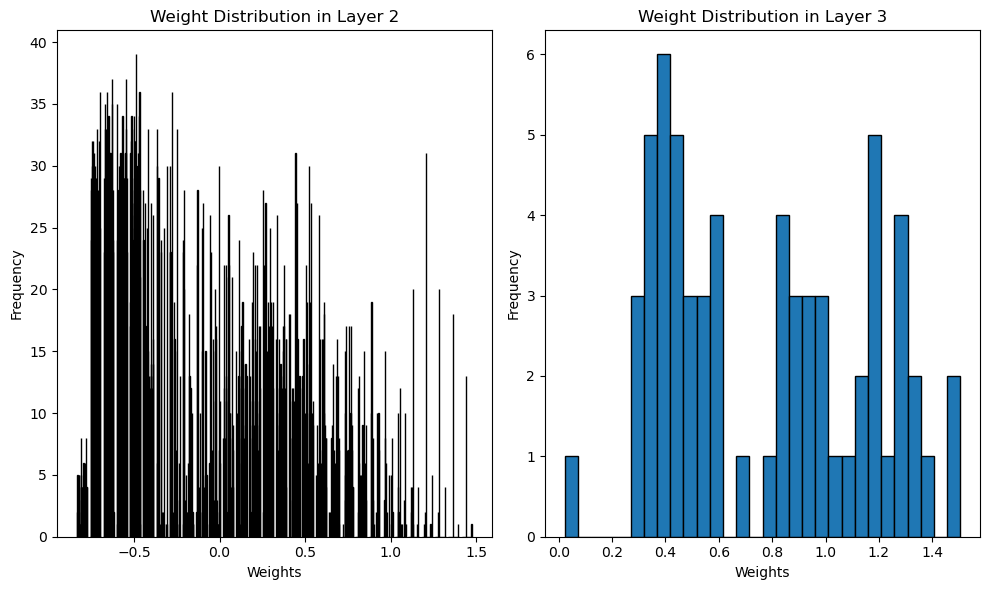

In [44]:

# Test for normality (Shapiro-Wilk test)
_, p_value_layer2 = stats.shapiro(weights_layer2)
_, p_value_layer3 = stats.shapiro(weights_layer3)

# Calculate skewness
skewness_layer2 = stats.skew(weights_layer2)
skewness_layer3 = stats.skew(weights_layer3)

# Define significance level and skewness threshold
significance_level = 0.05
skewness_threshold = 0.5

# Perform statistical analysis
if np.all(p_value_layer2 > significance_level):
    print("The weight distribution in layer 2 approximately follows a normal distribution.")
else:
    print("The weight distribution in layer 2 does not follow a normal distribution.")

if np.all(np.abs(skewness_layer2) < skewness_threshold):
    print("The weight distribution in layer 2 is within an acceptable skewness threshold.")
else:
    print("The weight distribution in layer 2 has a significant skewness.")

if np.all(p_value_layer3 > significance_level):
    print("The weight distribution in layer 3 approximately follows a normal distribution.")
else:
    print("The weight distribution in layer 3 does not follow a normal distribution.")

if np.all(np.abs(skewness_layer3) < skewness_threshold):
    print("The weight distribution in layer 3 is within an acceptable skewness threshold.")
else:
    print("The weight distribution in layer 3 has a significant skewness.")

# Summary statistics
mean_layer2 = np.mean(weights_layer2)
median_layer2 = np.median(weights_layer2)
std_layer2 = np.std(weights_layer2)

mean_layer3 = np.mean(weights_layer3)
median_layer3 = np.median(weights_layer3)
std_layer3 = np.std(weights_layer3)

print("Summary statistics for layer 2:")
print(f"Mean: {mean_layer2:.4f}, Median: {median_layer2:.4f}, Standard Deviation: {std_layer2:.4f}")

print("Summary statistics for layer 3:")
print(f"Mean: {mean_layer3:.4f}, Median: {median_layer3:.4f}, Standard Deviation: {std_layer3:.4f}")

# Visual analysis
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(weights_layer2, bins=30, edgecolor='black')
plt.title("Weight Distribution in Layer 2")
plt.xlabel("Weights")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(weights_layer3, bins=30, edgecolor='black')
plt.title("Weight Distribution in Layer 3")
plt.xlabel("Weights")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()